Green's function
==============

Fundamental solution
-------------------------------
$E$ here is the fundamental solution for the Laplacian

In [1]:
from sympy import *
from sympy.physics.vector.functions import dot
init_printing()

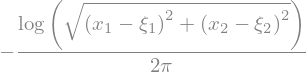

In [2]:
x1, x2, xi1, xi2 = symbols('x_1 x_2 xi_1 xi_2')
E = -1/(2*pi) * log(sqrt((x1-xi1)**2 + (x2-xi2)**2))
E

**Task**: Check that $\nabla^2_\xi E = 0$ for $x \neq \xi$.

*Hint*: https://docs.sympy.org/latest/tutorial/calculus.html#derivatives

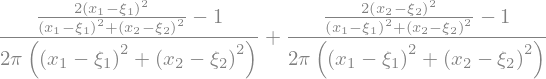

In [3]:
A = diff(E,x1,2)+diff(E,x2,2)
A

In [4]:
simplify(A)

Directional derivative
------------------------------

In [5]:
n1, n2 = symbols('n_1 n_2')
n = Matrix([n1,n2])
gradE = Matrix([diff(E,x1),diff(E,x2)])


**Task**: Compute the directional derivative $\frac{\partial E}{\partial n}$.

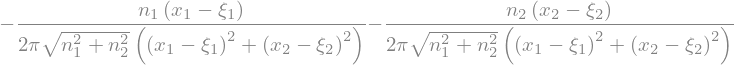

In [6]:
DirDerE = (n1/sqrt(n1**2+n2**2))*diff(E,x1) + (n2/sqrt(n1**2+n2**2))*diff(E,x2)
DirDerE

**Task** (optional): Write a function which returns the directional derivative of an expression.

In [7]:
def ddn(expr):
    NewExpr = (n1/sqrt(n1**2+n2**2))*diff(expr,x1) + (n2/sqrt(n1**2+n2**2))*diff(expr,x2)
    #NewExpr = diff(expr,x1) + diff(expr,x2)
    
    return NewExpr
    #pass

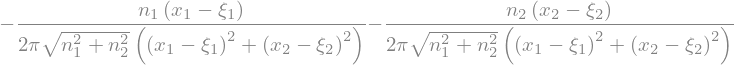

In [8]:
ddn(E)

Reflection principle
----------------------------

For simple geometries Green's function can sometimes be found by reflecting the fundamental solution at the boundary and linearly combining the fundamental solution with its reflection. 

![reflection principle](reflection_principle.png)

**Task**: Based on $E$, find the solution for the half-space problem
\begin{align*}
    \nabla^2G(x,\xi) &= -\delta(x-\xi), & \xi\in\Omega \\
    G(x,\xi) &= 0, & \xi\in\partial\Omega \\
    \Omega &= \{\xi\in\mathbb{R}^2 : \xi_2 > 0\}
\end{align*}

*Hint*: https://docs.sympy.org/latest/tutorial/basic_operations.html#substitution

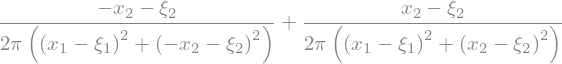

In [9]:
G = ddn(E)

Reflection = G.subs(x2, -x2)
TotalGreen = Reflection + G

SubsGreen = TotalGreen.subs(n1,0).subs(n2,-1)

SubsGreen

**Check condition**

In [10]:
SubsGreen.subs(xi2,0)

**Task**: Based on $E$, find the solution for the half-space problem
\begin{align*}
    \nabla^2G(x,\xi) &= -\delta(x-\xi), & \xi\in\Omega \\
    \frac{\partial G(x,\xi)}{\partial n} &= 0, & \xi\in\partial\Omega \\
    \Omega &= \{\xi\in\mathbb{R}^2 : \xi_2 > 0\}
\end{align*}

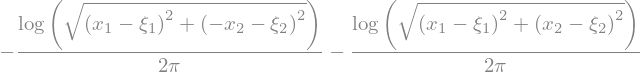

In [11]:
Reflection = E.subs(x2, -x2)
TotalGreen = Reflection + E
TotalGreen

**Check condition**

\begin{align*}
    \frac{\partial G(x,\xi)}{\partial n} &= 0, & \xi\in\partial\Omega
\end{align*}

In [12]:
ddn(TotalGreen).subs(n1,0).subs(n2,-1).subs(x2,0)